In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
orders = pd.read_csv('orders.csv')


# order_id = order identification number
# user_id = user identification number
# order_number = how many times an user had made purchases
# order_dow = day of week when an order had been made (Mon - Sun by 0 -6)
# order_hour_of_day = hour of day when an oder had been made (1 - 23 in hours)
# days_since_prior_order = day interval from the previous purchase to the next purchase

In [163]:
orders.tail()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0
3421082,272231,206209,train,14,6,14,30.0


In [113]:
len(orders['user_id'].unique())

206209

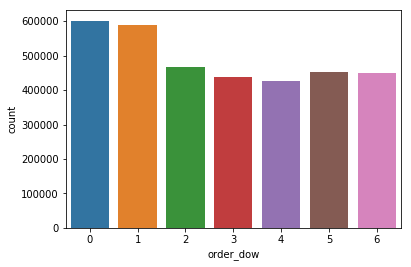

In [116]:
sns.countplot(orders['order_dow'])

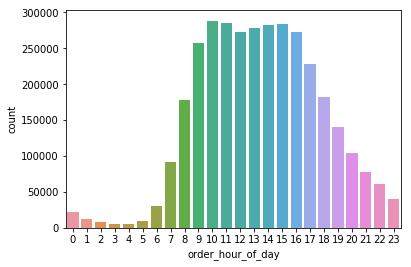

In [118]:
sns.countplot(orders['order_hour_of_day'])

In [157]:
grouped = orders.groupby(["order_dow", "order_hour_of_day"])["user_id"].aggregate("count").reset_index()

In [158]:
grouped_pivot = grouped.pivot('order_dow', 'order_hour_of_day', 'user_id')

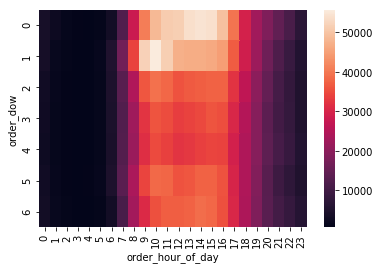

In [159]:
sns.heatmap(grouped_pivot)

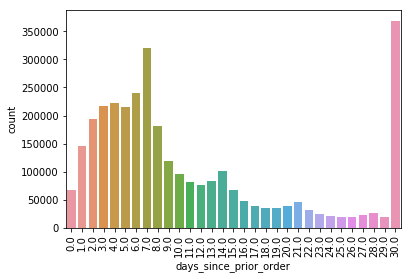

In [161]:
plt.xticks(rotation='vertical')
sns.countplot(orders['days_since_prior_order'])

# 59688 products exist in 134 aisles in 21 departments

In [10]:
products = pd.read_csv('products.csv')


# product_id = product identification number
# product_name = product name
# aisle_id = aisle number
# department_id = department number 

In [11]:
products.tail()

,product_id,product_name,aisle_id,department_id
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8
49687,49688,Fresh Foaming Cleanser,73,11


In [15]:
aisles = pd.read_csv('aisles.csv')

# aisle (string) is matched with aisle_id (int)

In [16]:
aisles.tail()

,aisle_id,aisle
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief
133,134,specialty wines champagnes


In [17]:
merged_p_a = pd.merge(left = products, right = aisles)

In [18]:
merged_p_a.tail()

,product_id,product_name,aisle_id,department_id,aisle
49683,47769,Peas and Potatoe Roti Paratha,76,6,indian foods
49684,48292,Punjabi Chhole Chickpeas with Potatoes & Onions,76,6,indian foods
49685,48480,Punjab Eggplant,76,6,indian foods
49686,48830,Pav Bhaji Mashed Vegetable Curry,76,6,indian foods
49687,49278,Channa Masala Chickpea Curry,76,6,indian foods


In [29]:
print(merged_p_a.aisle.value_counts())
merged_p_a.aisle.value_counts().sum()

missing                          1258
candy chocolate                  1246
ice cream ice                    1091
vitamins supplements             1038
yogurt                           1026
chips pretzels                    989
tea                               894
packaged cheese                   891
frozen meals                      880
cookies cakes                     874
energy granola bars               832
hair care                         816
spices seasonings                 797
juice nectars                     792
crackers                          747
soup broth bouillon               737
baby food formula                 718
coffee                            680
refrigerated                      675
cleaning products                 655
baking ingredients                623
packaged vegetables fruits        615
asian foods                       605
nuts seeds dried fruit            582
fresh vegetables                  569
oral hygiene                      565
salad dressi

49688

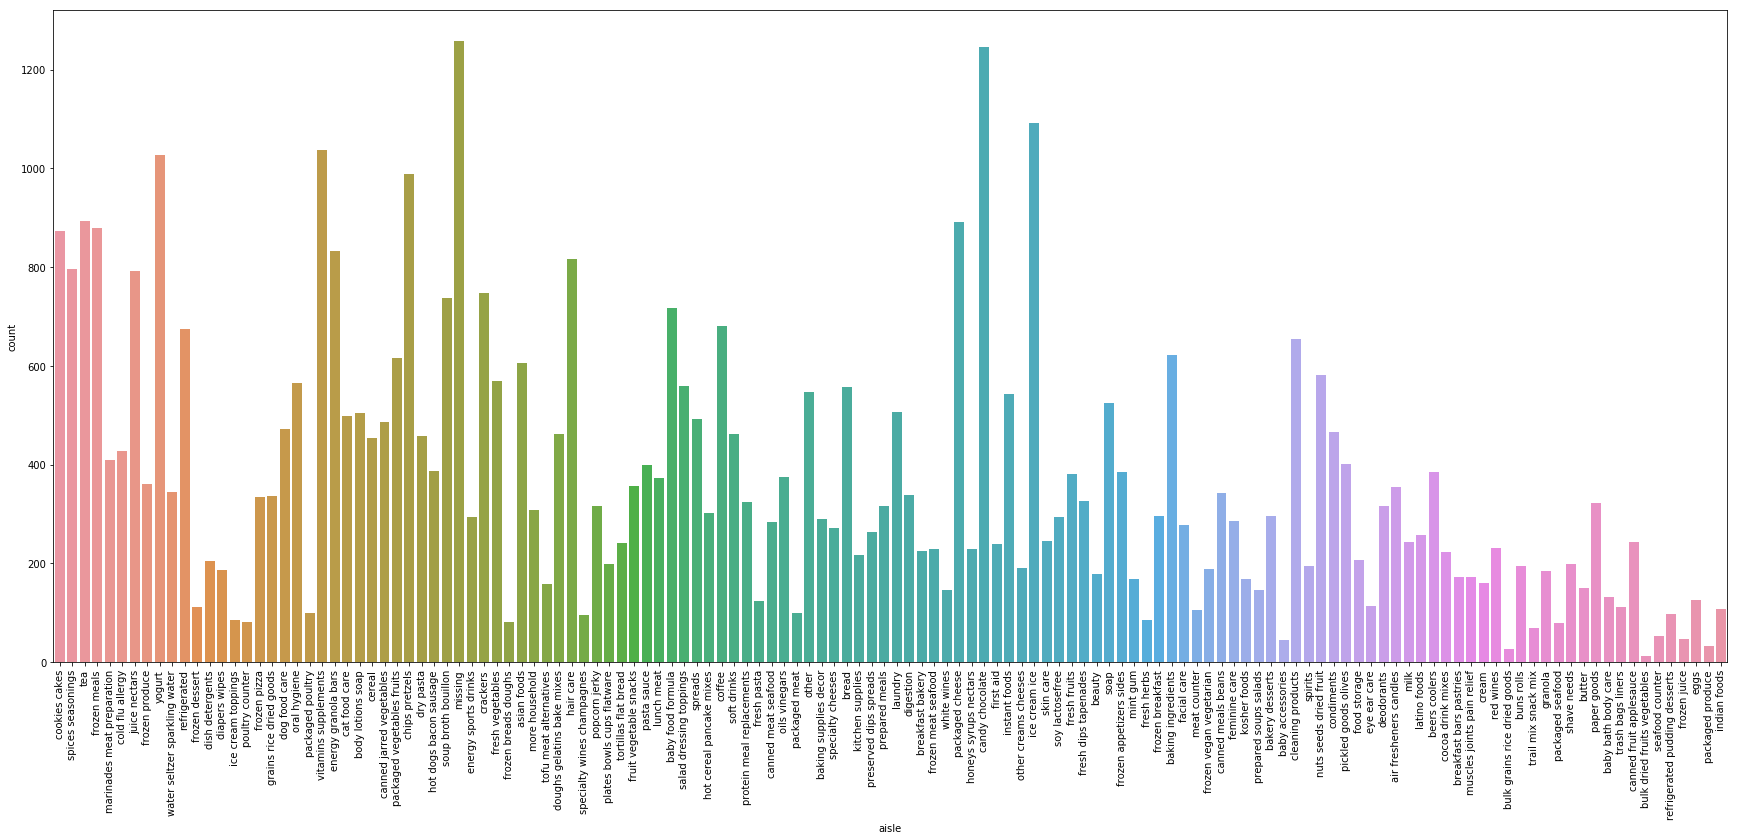

In [176]:
plt.figure(figsize=(30, 12))
plt.xticks(rotation='vertical')
sns.countplot(merged_p_a['aisle'])

In [30]:
departments = pd.read_csv('departments.csv')

# department (string) is matched with department_id (int)

In [31]:
departments.tail()

,department_id,department
16,17,household
17,18,babies
18,19,snacks
19,20,deli
20,21,missing


In [32]:
merged_p_a_d = pd.merge(left = merged_p_a, right = departments)

In [33]:
print(merged_p_a_d.department.value_counts())
merged_p_a_d.department.value_counts().sum()

personal care      6563
snacks             6264
pantry             5371
beverages          4365
frozen             4007
dairy eggs         3449
household          3085
canned goods       2092
dry goods pasta    1858
produce            1684
bakery             1516
deli               1322
missing            1258
international      1139
breakfast          1115
babies             1081
alcohol            1054
pets                972
meat seafood        907
other               548
bulk                 38
Name: department, dtype: int64


49688

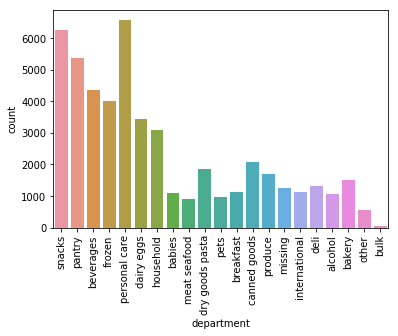

In [174]:
plt.xticks(rotation='vertical')
sns.countplot(merged_p_a_d['department'])

In [101]:
def get_len(x):
    return len(x)

print (merged_p_a_d.groupby('department')['aisle'].unique())
merged_p_a_d.groupby('department')['aisle'].unique().apply(get_len)

department
alcohol            [specialty wines champagnes, white wines, spir...
babies             [diapers wipes, baby food formula, baby access...
bakery             [tortillas flat bread, bread, breakfast bakery...
beverages          [tea, juice nectars, water seltzer sparkling w...
breakfast          [cereal, hot cereal pancake mixes, breakfast b...
bulk               [bulk grains rice dried goods, bulk dried frui...
canned goods       [canned jarred vegetables, soup broth bouillon...
dairy eggs         [yogurt, specialty cheeses, packaged cheese, o...
deli               [tofu meat alternatives, lunch meat, prepared ...
dry goods pasta    [grains rice dried goods, dry pasta, pasta sau...
frozen             [frozen meals, frozen produce, frozen dessert,...
household          [dish detergents, more household, plates bowls...
international      [asian foods, kosher foods, latino foods, indi...
meat seafood       [poultry counter, packaged poultry, hot dogs b...
missing                

department
alcohol             5
babies              4
bakery              5
beverages           8
breakfast           4
bulk                2
canned goods        5
dairy eggs         10
deli                5
dry goods pasta     5
frozen             11
household          10
international       4
meat seafood        7
missing             1
other               1
pantry             12
personal care      17
pets                2
produce             5
snacks             11
Name: aisle, dtype: int64

In [102]:
print (merged_p_a_d.groupby('aisle')['product_name'].unique())
merged_p_a_d.groupby('aisle')['product_name'].unique().apply(get_len)

aisle
air fresheners candles           [Apple Cinnamon Crisp Candle, Disinfectant Spr...
asian foods                      [Onion Flavor Organic Roasted Seaweed Snack, S...
baby accessories                 [Totz Toothbrush Extra Soft 18+ Months, Miracl...
baby bath body care              [Shampoo Baby Shampoo, Tea Tree & Lavender Sha...
baby food formula                [Banana & Sweet Potato Organic Teething Wafers...
bakery desserts                  [6\" Organic Carrot Cake, Marble Cake Slice, F...
baking ingredients               [Halves & Pieces Walnuts, Organic Enriched Unb...
baking supplies decor            [Sprinklez Confetti Fun Organic Toppings, 100%...
beauty                           [Aromatherapaes Stress Reducing Lavender & Cha...
beers coolers                    [Mixed 12 Pack Lion's Share Ale, Super Dry Bee...
body lotions soap                [Complete Spring Water Foaming Antibacterial H...
bread                            [Bread, Healthy Whole Grain, Organic Sprouted ..

aisle
air fresheners candles            355
asian foods                       605
baby accessories                   44
baby bath body care               132
baby food formula                 718
bakery desserts                   297
baking ingredients                623
baking supplies decor             290
beauty                            178
beers coolers                     385
body lotions soap                 504
bread                             557
breakfast bakery                  226
breakfast bars pastries           173
bulk dried fruits vegetables       12
bulk grains rice dried goods       26
buns rolls                        195
butter                            150
candy chocolate                  1246
canned fruit applesauce           243
canned jarred vegetables          487
canned meals beans                342
canned meat seafood               283
cat food care                     499
cereal                            454
chips pretzels                    989
cleani

In [164]:
order_products__prior = pd.read_csv('order_products__prior.csv')

In [165]:
order_products__prior.tail()

,order_id,product_id,add_to_cart_order,reordered
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1
32434488,3421083,5020,10,1


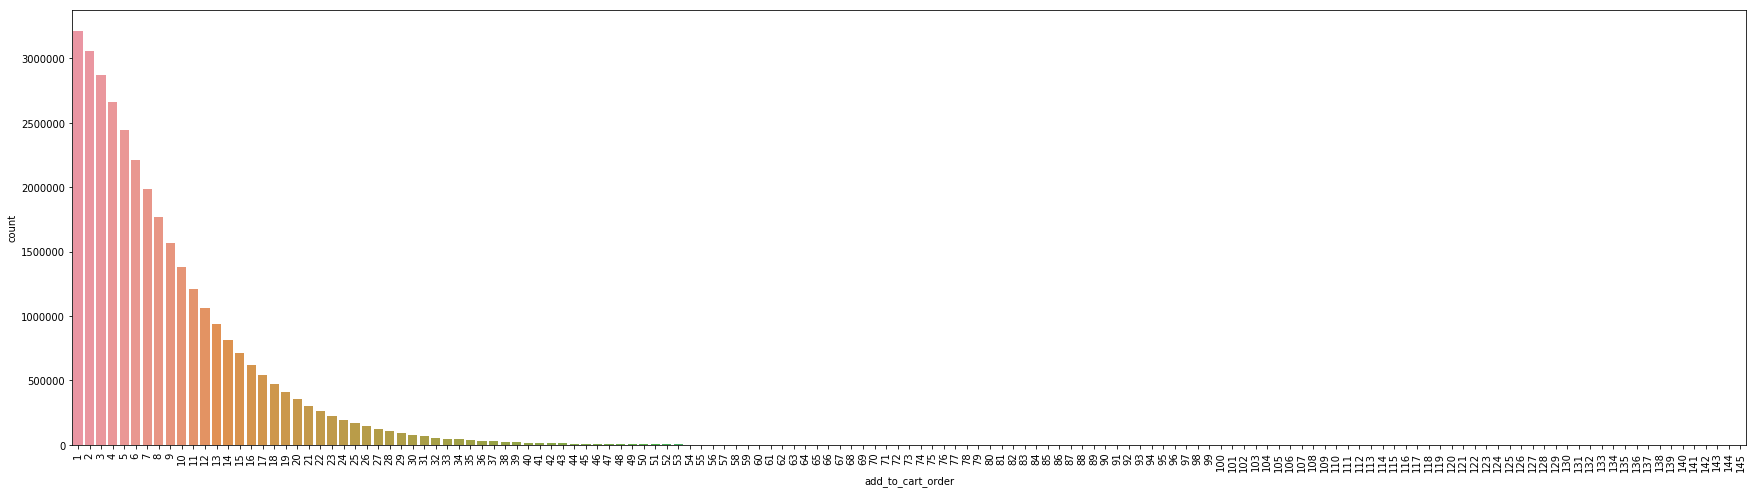

In [169]:
plt.figure(figsize=(30,8))
plt.xticks(rotation = 'vertical')
sns.countplot(order_products__prior['add_to_cart_order'])

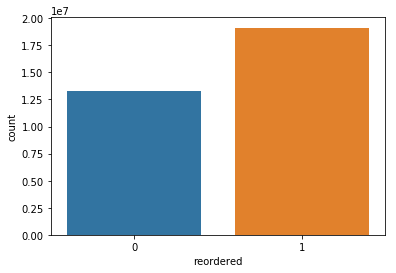

In [170]:
sns.countplot(order_products__prior['reordered'])